In [8]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')

In [9]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


General information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Checking out missing values

In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Dealing wiht missing values

1)For Maths column, we will drop the rows

In [13]:
import numpy as np
df.drop(df.index[df['math score'].isna()], inplace=True)

In [14]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [16]:
df['math score'].isnull().sum()

0

2)For Reading column we will replace null values by 75

In [18]:
df['reading score'] = df['reading score'].fillna(75)

In [19]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [15]:
df['reading score'].isnull().sum()

0

3)For Wriitng we will take out mean and will use fillna method

In [20]:
m=df['writing score'].mean()

In [21]:
m

68.054

In [22]:
df['writing score'].fillna(m)

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing score, Length: 1000, dtype: int64

In [25]:
df['writing score'].isnull().sum()

0

In [26]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

Outliers 
Detecting oultliers with help of box plot

<Axes: >

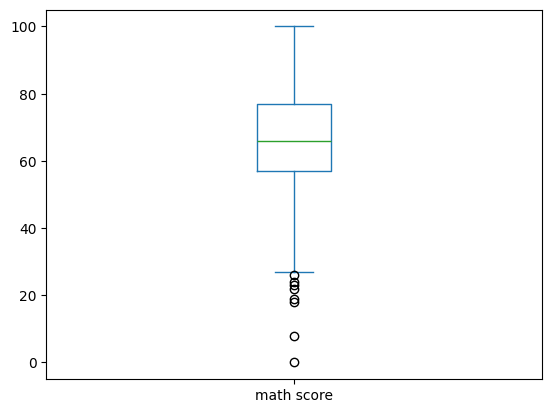

In [27]:
df['math score'].plot.box()

In the above plot circle reprsents the oulier value, value aboe 120 are outliers. Let's remove it 

In [31]:
df=df[df['math score']>=30]

<Axes: >

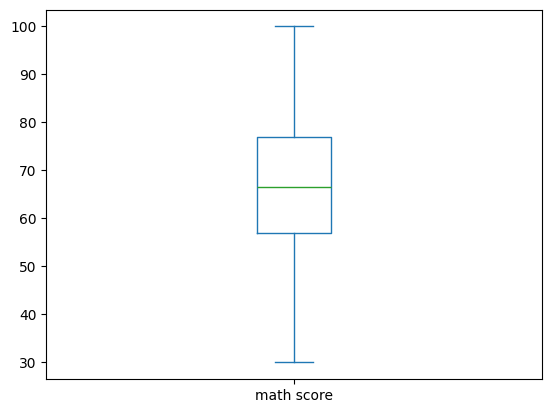

In [32]:
df['math score'].plot.box()

Now, there is no outlier in the Maths Column

For Reading and Writing column also , we will go for box plot

In [33]:
import matplotlib.pyplot as plt

<Axes: >

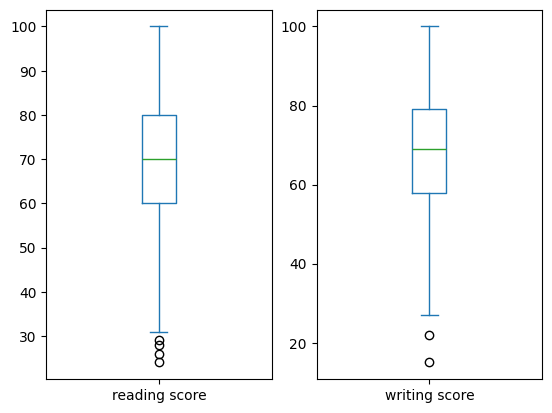

In [34]:
plt.subplot(1,2,1)
df['reading score'].plot.box()
plt.subplot(1,2,2)
df['writing score'].plot.box()

Here outlier for reading and writing col is above 100. Let's remove them

In [35]:
df=df[df['reading score']>=30]
df=df[df['writing score']>=30]

<Axes: >

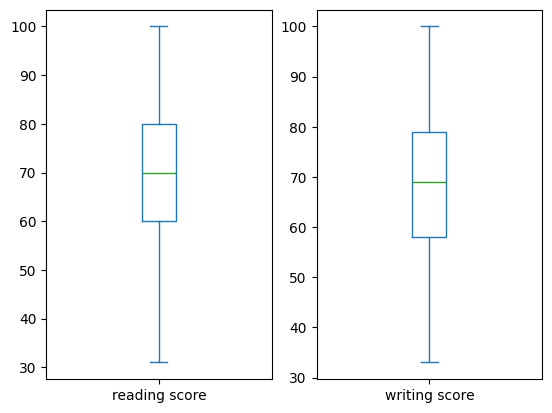

In [36]:
plt.subplot(1,2,1)
df['reading score'].plot.box()

plt.subplot(1,2,2)
df['writing score'].plot.box()

Placement_Count is dependent on Placement column . So, let's use scatter() function 

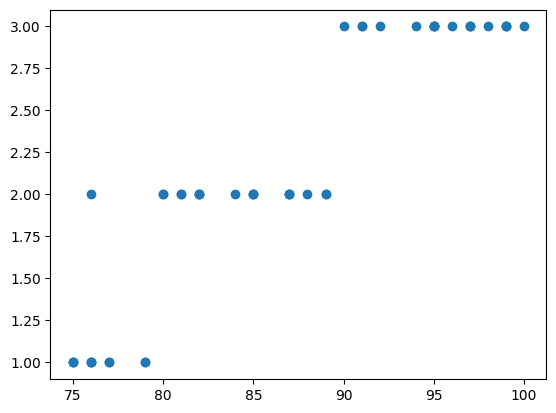

In [37]:
plt.scatter(df['Placement'],df['Placement_Count'])

Looking at the plot ,we can say that Placement_Count of 4 and above is outlier. So, let's remove it 

In [38]:
df=df[df['Placement_Count']<4]

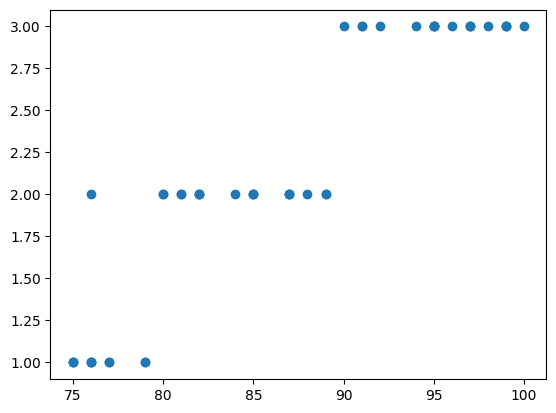

In [39]:
plt.scatter(df['Placement'],df['Placement_Count'])